In [1]:
#Labelled Faces in the Wild (LFW)
#Import scikit-learn library
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#this command will download the LFW_people's dataset to hard disk.
people=fetch_lfw_people()

In [37]:
print("Size of each image") 
people.images[0].shape 

Size of each image


(62, 47)

In [ ]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = people.images.shape
# Instead of providing 2D data, X has data already in the form  of a vector that
# is required in this approach.
X = people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = people.target
target_names = people.target_names
n_classes = target_names.shape[0]

# Print Details about dataset
print("Number of Data Samples: % d" % n_samples)
print("Feature Dimension: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

In [39]:
# gives a tuple with the shape of DataFrame
X.shape

(13233, 2914)

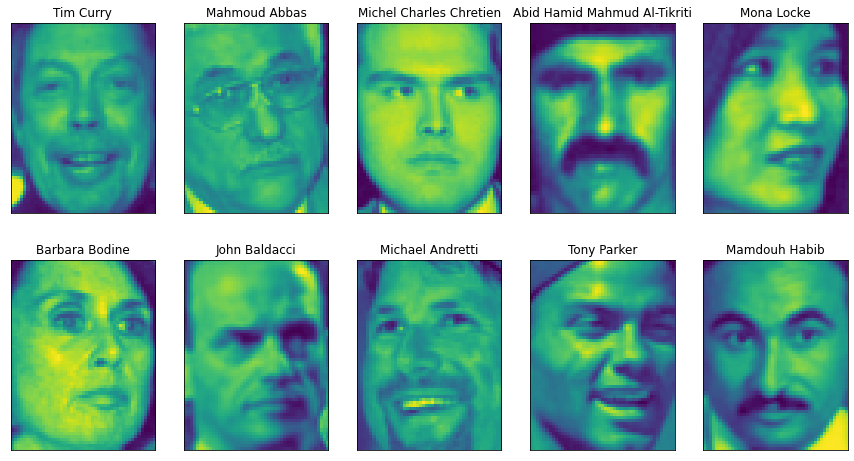

In [40]:
# Function to plot images in 2*5
fix,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target, image, ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [7]:
#prints the names of all unique the persons present in the dataset
a=people.target_names
print(a)

['AJ Cook' 'AJ Lamas' 'Aaron Eckhart' ... 'Zumrati Juma' 'Zurab Tsereteli'
 'Zydrunas Ilgauskas']


In [42]:
#prints the total number of unique persons in the dataset
len(people.target_names)

5749

In [43]:
#displays the keys of the dataset
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [44]:
#description of the dataset
people.DESCR

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\ni

In [45]:
#printing a list which contains the number of face for each person from the dataset
print("Numbers of face of per person")
import numpy as np
b=np.bincount(y)
b

Numbers of face of per person


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
#printing a tuple which prints the names of the persons and the total number of their pictures
print("Names with their total number of pictures")
q=zip(a,b)
v=tuple(q)
for i in range(0,len(v)):
  print(v[i])

Names with their total number of pictures
('AJ Cook', 1)
('AJ Lamas', 1)
('Aaron Eckhart', 1)
('Aaron Guiel', 1)
('Aaron Patterson', 1)
('Aaron Peirsol', 4)
('Aaron Pena', 1)
('Aaron Sorkin', 2)
('Aaron Tippin', 1)
('Abba Eban', 1)
('Abbas Kiarostami', 1)
('Abdel Aziz Al-Hakim', 1)
('Abdel Madi Shabneh', 1)
('Abdel Nasser Assidi', 2)
('Abdoulaye Wade', 4)
('Abdul Majeed Shobokshi', 1)
('Abdul Rahman', 1)
('Abdulaziz Kamilov', 1)
('Abdullah', 4)
('Abdullah Ahmad Badawi', 1)
('Abdullah Gul', 19)
('Abdullah Nasseef', 1)
('Abdullah al-Attiyah', 3)
('Abdullatif Sener', 2)
('Abel Aguilar', 1)
('Abel Pacheco', 4)
('Abid Hamid Mahmud Al-Tikriti', 3)
('Abner Martinez', 1)
('Abraham Foxman', 1)
('Aby Har-Even', 1)
('Adam Ant', 1)
('Adam Freier', 1)
('Adam Herbert', 1)
('Adam Kennedy', 1)
('Adam Mair', 1)
('Adam Rich', 1)
('Adam Sandler', 4)
('Adam Scott', 2)
('Adel Al-Jubeir', 3)
('Adelina Avila', 1)
('Adisai Bodharamik', 1)
('Adolfo Aguilar Zinser', 3)
('Adolfo Rodriguez Saa', 2)
('Adoor Gopala

('Dalai Lama', 2)
('Dale Bosworth', 1)
('Dale Earnhardt', 1)
('Dale Earnhardt Jr', 4)
('Dalia Rabin-Pelosoff', 1)
('Damarius Bilbo', 1)
('Damon Dash', 1)
('Damon Stoudamire', 1)
('Damon van Dam', 2)
('Dan Ackroyd', 1)
('Dan Bartlett', 1)
('Dan Boyle', 1)
('Dan Bylsma', 1)
('Dan Dickau', 1)
('Dan Duquette', 1)
('Dan Guerrero', 1)
('Dan Kellner', 1)
('Dan LaCoutre', 1)
('Dan Monson', 1)
('Dan Morales', 3)
('Dan Prinster', 1)
('Dan Quayle', 1)
('Dan Reeves', 1)
('Dan Snyder', 1)
('Dan Wheldon', 2)
('Dana Vollmer', 1)
('Daniel Barenboim', 1)
('Daniel Bruehl', 1)
('Daniel Chin', 1)
('Daniel Coats', 1)
('Daniel Comisso Urdaneta', 1)
('Daniel Darnell', 1)
('Daniel Day-Lewis', 3)
('Daniel Kurtzer', 1)
('Daniel Montenegro', 1)
('Daniel Montgomery', 1)
('Daniel Ortega', 1)
('Daniel Osorno', 1)
('Daniel Patrick Moynihan', 1)
('Daniel Pearl', 1)
('Daniel Radcliffe', 4)
('Daniel Rouse', 1)
('Daniel Scioli', 1)
('Daniel Zelman', 1)
('Daniela Cicarelli', 1)
('Daniela Hantuchova', 2)
('Daniele Bergami

('Jana Henke', 1)
('Jana Pittman', 1)
('Jane Clayson', 1)
('Jane Fonda', 2)
('Jane Kaczmarek', 2)
('Jane Krakowski', 1)
('Jane Leeves', 1)
('Jane Menelaus', 1)
('Jane Pauley', 2)
('Jane Riley', 1)
('Jane Rooney', 1)
('Jane Russell', 1)
('Jane Walker Wood', 1)
('Janela Jara', 1)
('Janet Chandler', 1)
('Janet Crawford', 1)
('Janet Ecker', 1)
('Janet Horvath', 1)
('Janet Leigh', 1)
('Janet Napolitano', 4)
('Janet Thorpe', 2)
('Janette Husarova', 1)
('Janez Drnovsek', 1)
('Janica Kostelic', 2)
('Janice Abreu', 1)
('Janice Goldfinger', 1)
('Janine Pietsch', 1)
('Janis Ruth Coulter', 1)
('Janusz Kaminski', 1)
('Jaouad Gharib', 1)
('Jaqueline Godoy', 1)
('Jaromir Jagr', 1)
('Jason Alexander', 2)
('Jason Bentley', 1)
('Jason Biggs', 1)
('Jason Campbell', 1)
('Jason Clermont', 1)
('Jason Gardner', 1)
('Jason Jennings', 2)
('Jason Kapono', 1)
('Jason Keep', 1)
('Jason Kidd', 10)
('Jason Lezak', 2)
('Jason Mewes', 1)
('Jason Petty', 1)
('Jason Priestley', 1)
('Jason Sehorn', 1)
('Jason Sorens', 1

('Mike Tyson', 4)
('Mike Webster', 1)
('Mike Weir', 11)
('Mikhail Gorbachev', 2)
('Mikhail Kalashnikov', 1)
('Mikhail Kasyanov', 4)
('Mikhail Khodorkovsky', 1)
('Mikhail Shvydkoi', 1)
('Mikhail Wehbe', 4)
('Mikhail Youzhny', 3)
('Mikulas Dzurinda', 2)
('Milan Kucan', 1)
('Milan Milutinovic', 1)
('Mile Mrksic', 1)
('Miles Stewart', 1)
('Millicent Martin', 1)
('Milo Djukanovic', 3)
('Milo Maestrecampo', 3)
('Milt Heflin', 1)
('Milt Palacio', 1)
('Milton Berle', 1)
('Milton Wynants', 1)
('Minnie Driver', 2)
('Minnie Mendoza', 1)
('Mira Sorvino', 1)
('Miranda Gaddis', 1)
('Miranda Otto', 1)
('Mireille Jospin-Dandieu', 1)
('Mirela Manjani', 1)
('Mireya Elisa Moscoso Rodriguez', 1)
('Mireya Moscoso', 5)
('Miroljub', 2)
('Missy Crider', 1)
('Misty Dawn Clymer', 1)
('Mitar Rasevic', 1)
('Mitch Kupchak', 1)
('Mitchell Crooks', 1)
('Mitchell Daniels', 4)
('Mitchell Garabedian', 1)
('Mitchell McLaughlin', 1)
('Mitchell Potter', 1)
('Mitchell Swartz', 1)
('Mitoji Yabunaka', 2)
('Mitsou Gelinas', 1

('Tina Conner', 1)
('Tina Fey', 1)
('Tina Pisnik', 1)
('Tina Sinatra', 1)
('Tino Martinez', 1)
('Tippi Hedren', 2)
('Tirunesh Dibaba', 1)
('Toby Keith', 1)
('Tocker Pudwill', 1)
('Todd Haynes', 4)
('Todd MacCulloch', 1)
('Todd Parrott', 1)
('Todd Petit', 1)
('Todd Reid', 1)
('Todd Robbins', 1)
('Todd Wike', 1)
('Tom Amstutz', 1)
('Tom Brady', 2)
('Tom Brennan', 1)
('Tom Christerson', 1)
('Tom Coughlin', 1)
('Tom Coverdale', 2)
('Tom Craddick', 4)
('Tom Crean', 5)
('Tom Cruise', 10)
('Tom Curley', 1)
('Tom Daschle', 25)
('Tom DeLay', 1)
('Tom Foy', 1)
('Tom Gamboa', 1)
('Tom Glavine', 2)
('Tom Hanks', 10)
('Tom Hanusik', 1)
('Tom Harkin', 5)
('Tom Izzo', 1)
('Tom Jones', 2)
('Tom Kelly', 1)
('Tom Koenigs', 1)
('Tom Lantos', 1)
('Tom McClintock', 1)
('Tom Miller', 1)
('Tom Moss', 1)
('Tom OBrien', 1)
('Tom Osborne', 1)
('Tom Poston', 1)
('Tom Reilly', 3)
('Tom Ridge', 33)
('Tom Rouen', 1)
('Tom Schnackenberg', 1)
('Tom Scully', 1)
('Tom Sizemore', 1)
('Tom Smothers', 1)
('Tom Tunney', 1)

In [47]:
#printing first 10 names with their total number of pictures
q=zip(a,b)
v=tuple(q)
for i in range(0,10):
  print(v[i])

('AJ Cook', 1)
('AJ Lamas', 1)
('Aaron Eckhart', 1)
('Aaron Guiel', 1)
('Aaron Patterson', 1)
('Aaron Peirsol', 4)
('Aaron Pena', 1)
('Aaron Sorkin', 2)
('Aaron Tippin', 1)
('Abba Eban', 1)


In [ ]:
#splitting the whole dataset using the train_test_split() function
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)
print("size of Training Data is % d and Testing Data is % d" %(
        y_train.shape[0], y_test.shape[0]))

In [49]:
#printing the dimension of the training data
print("Dimention of traning data..")
X_train.shape

Dimention of traning data..


(9924, 2914)

In [ ]:
#applying the knn algorithm on the dataset
training_accuracy=[]
test_accuracy=[]
#try n_neighbors from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
#build the model
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test,y_test))

In [51]:
print("Test accuracy for whole dataset..")
test_accuracy

Test accuracy for whole dataset..


[0.07978241160471441,
 0.060441220912662436,
 0.05862798428528256,
 0.060441220912662436,
 0.06376548806285887,
 0.066787549108492,
 0.06769416742218193,
 0.06950740404956181,
 0.07373828951344817,
 0.0743427017225748]

In [52]:
print("Train accuracy for whole dataset..")
training_accuracy

Train accuracy for whole dataset..


[1.0,
 0.5308343409915357,
 0.383111648528819,
 0.31418782748891577,
 0.280229746070133,
 0.2573559048770657,
 0.24214026602176542,
 0.23266827891979042,
 0.22329705763804916,
 0.21644498186215236]

Plotting accuracy graph for training and testing data....


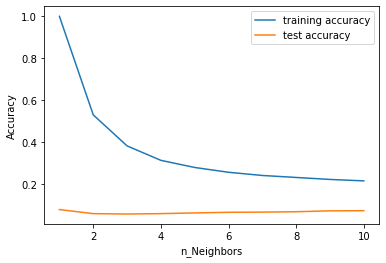

In [53]:
#plotting a graph showing training and testing accuracy after applying knn algorithm
print("Plotting accuracy graph for training and testing data....")
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_Neighbors")
plt.legend()

In [2]:
#storing the data with the number of person as 5,10,15,20,25 and 30 in the variables p1,p2,p3,p,p5 and p6
p1=fetch_lfw_people(min_faces_per_person=5)
p2=fetch_lfw_people(min_faces_per_person=10)
p3=fetch_lfw_people(min_faces_per_person=15)
p4=fetch_lfw_people(min_faces_per_person=20)
p5=fetch_lfw_people(min_faces_per_person=25)
p6=fetch_lfw_people(min_faces_per_person=30)

In [55]:
#applying the knn algorithm on the dataset of min face 5
print("For min face 5")
target1_names=p1.target_names
print("Length of the dataset",len(target1_names))

X1 = p1.data
y1 = p1.target
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 42)
print("size of Training Data is % d and Testing Data is % d" %(y1_train.shape[0], y1_test.shape[0]))
training_accuracy1=[]
test_accuracy1=[]
#try n_neighbors from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
#build the model
 clf=KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X1_train,y1_train)
 #record training set accuracy
 training_accuracy1.append(clf.score(X1_train,y1_train))
 #record generalization accuracy
 test_accuracy1.append(clf.score(X1_test,y1_test))

For min face 5
Length of the dataset 423
size of Training Data is  4488 and Testing Data is  1497


In [56]:
training_accuracy1

[1.0,
 0.589349376114082,
 0.4674688057040998,
 0.42312834224598933,
 0.39126559714795006,
 0.37544563279857396,
 0.36541889483065954,
 0.34959893048128343,
 0.3424688057040998,
 0.3335561497326203]

In [57]:
test_accuracy1

[0.1957247828991316,
 0.17034068136272545,
 0.1690046760187041,
 0.16633266533066132,
 0.17100868403473615,
 0.17167668670674682,
 0.16700066800267202,
 0.16700066800267202,
 0.1683366733466934,
 0.17568470273881096]

In [58]:
#applying the knn algorithm on the dataset of min face 10
print("For min face 10")
target2_names=p2.target_names
print("Length of the dataset",len(target2_names))

X2 = p2.data
y2 = p2.target
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 42)
print("size of Training Data is % d and Testing Data is % d" %(y2_train.shape[0], y2_test.shape[0]))
training_accuracy2=[]
test_accuracy2=[]
#try n_neighbors from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
#build the model
 clf=KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X2_train,y2_train)
 #record training set accuracy
 training_accuracy2.append(clf.score(X2_train,y2_train))
 #record generalization accuracy
 test_accuracy2.append(clf.score(X2_test,y2_test))

For min face 10
Length of the dataset 158
size of Training Data is  3243 and Testing Data is  1081


In [59]:
training_accuracy2

[1.0,
 0.6099290780141844,
 0.5161887141535615,
 0.4838112858464385,
 0.46253469010175763,
 0.4406413814369411,
 0.4326241134751773,
 0.4212149244526673,
 0.4061054579093432,
 0.39222941720629045]

In [60]:
test_accuracy2

[0.24421831637372804,
 0.19796484736355227,
 0.20074005550416282,
 0.21739130434782608,
 0.22571692876965774,
 0.2238667900092507,
 0.2247918593894542,
 0.22664199814986125,
 0.22664199814986125,
 0.23404255319148937]

In [10]:
#applying the knn algorithm on the dataset of min face 15
print("For min face 15")
target3_names=p3.target_names
print("Length of the dataset",len(target3_names))

X3 = p3.data
y3 = p3.target
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.25, random_state = 42)
print("size of Training Data is % d and Testing Data is % d" %(y3_train.shape[0], y3_test.shape[0]))
training_accuracy3=[]
test_accuracy3=[]
#try n_neighbors from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
#build the model
 clf=KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X3_train,y3_train)
 #record training set accuracy
 training_accuracy3.append(clf.score(X3_train,y3_train))
 #record generalization accuracy
 test_accuracy3.append(clf.score(X3_test,y3_test))

For min face 15
Length of the dataset 96
size of Training Data is  2696 and Testing Data is  899


In [62]:
training_accuracy3

[1.0,
 0.650593471810089,
 0.5545252225519288,
 0.526706231454006,
 0.5096439169139466,
 0.4862759643916914,
 0.4736646884272997,
 0.4647626112759644,
 0.44584569732937684,
 0.43397626112759646]

In [63]:
test_accuracy3

[0.2836484983314794,
 0.2324805339265851,
 0.23915461624026696,
 0.25472747497219134,
 0.25917686318131256,
 0.2625139043381535,
 0.26473859844271413,
 0.26585094549499444,
 0.26918798665183535,
 0.26473859844271413]

In [11]:
#applying the knn algorithm on the dataset of min face 20
print("For min face 20")
target4_names=p4.target_names
print("Length of the dataset",len(target4_names))

X4 = p4.data
y4 = p4.target
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.25, random_state = 42)
print("size of Training Data is % d and Testing Data is % d" %(y4_train.shape[0], y4_test.shape[0]))
training_accuracy4=[]
test_accuracy4=[]
#try n_neighbors from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
#build the model
 clf=KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X4_train,y4_train)
 #record training set accuracy
 training_accuracy4.append(clf.score(X4_train,y4_train))
 #record generalization accuracy
 test_accuracy4.append(clf.score(X4_test,y4_test))

For min face 20
Length of the dataset 62
size of Training Data is  2267 and Testing Data is  756


In [65]:
training_accuracy4

[1.0,
 0.6554918394353771,
 0.5796206440229378,
 0.541243934715483,
 0.5284516982796648,
 0.5116894574327305,
 0.5041905602117336,
 0.4878694309660344,
 0.46493162770180857,
 0.45125716806352006]

In [66]:
test_accuracy4

[0.2976190476190476,
 0.2777777777777778,
 0.2857142857142857,
 0.29365079365079366,
 0.3148148148148148,
 0.31746031746031744,
 0.3187830687830688,
 0.3187830687830688,
 0.31746031746031744,
 0.30952380952380953]

In [12]:
#applying the knn algorithm on the dataset of min face 25
print("For min face 25")

target5_names=p5.target_names
print("Length of the dataset",len(target5_names))

X5 = p5.data
y5 = p5.target
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.25, random_state = 42)
print("size of Training Data is % d and Testing Data is % d" %(y5_train.shape[0], y5_test.shape[0]))
training_accuracy5=[]
test_accuracy5=[]
#try n_neighbors from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
#build the model
 clf=KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X5_train,y5_train)
 #record training set accuracy
 training_accuracy5.append(clf.score(X5_train,y5_train))
 #record generalization accuracy
 test_accuracy5.append(clf.score(X5_test,y5_test))

For min face 25
Length of the dataset 42
size of Training Data is  1941 and Testing Data is  647


In [68]:
test_accuracy5

[0.3601236476043277,
 0.3508500772797527,
 0.3462132921174652,
 0.357032457496136,
 0.3554868624420402,
 0.3462132921174652,
 0.35239567233384855,
 0.35239567233384855,
 0.357032457496136,
 0.35857805255023184]

In [13]:
#applying the knn algorithm on the dataset of min face 30

print("For min face 30")

target6_names=p6.target_names
print("Length of the dataset",len(target6_names))

X6 = p6.data
y6 = p6.target
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = 0.25, random_state = 42)
print("size of Training Data is % d and Testing Data is % d" %(y6_train.shape[0], y6_test.shape[0]))
training_accuracy6=[]
test_accuracy6=[]
#try n_neighbors from 1 to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
#build the model
 clf=KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X6_train,y6_train)
 #record training set accuracy
 training_accuracy6.append(clf.score(X6_train,y6_train))
 #record generalization accuracy
 test_accuracy6.append(clf.score(X6_test,y6_test))

For min face 30
Length of the dataset 34
size of Training Data is  1777 and Testing Data is  593


In [70]:
test_accuracy6

[0.3827993254637437,
 0.3962900505902192,
 0.38617200674536256,
 0.3912310286677909,
 0.40978077571669475,
 0.40809443507588533,
 0.4131534569983137,
 0.4266441821247892,
 0.418212478920742,
 0.4131534569983137]

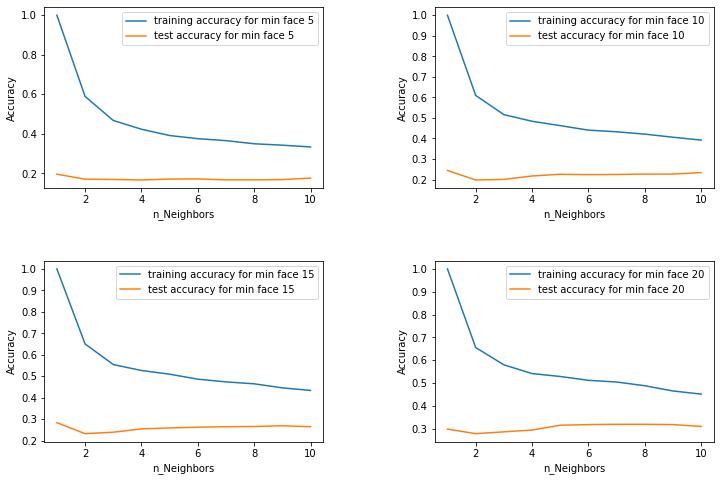

In [71]:
#plotting the graphs for min face 5,10,15 and 20 after applying knn algorithm
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 5):
  ax = fig.add_subplot(2, 2, i)
  if(i==1):
    plt.plot(neighbors_settings,training_accuracy1,label="training accuracy for min face 5")
    plt.plot(neighbors_settings,test_accuracy1,label="test accuracy for min face 5")
    plt.ylabel("Accuracy")
    plt.xlabel("n_Neighbors")
    plt.legend()
  elif(i==2):
    plt.plot(neighbors_settings,training_accuracy2,label="training accuracy for min face 10")
    plt.plot(neighbors_settings,test_accuracy2,label="test accuracy for min face 10")
    plt.ylabel("Accuracy")
    plt.xlabel("n_Neighbors")
    plt.legend()
  elif(i==3):
    plt.plot(neighbors_settings,training_accuracy3,label="training accuracy for min face 15")
    plt.plot(neighbors_settings,test_accuracy3,label="test accuracy for min face 15")  
    plt.ylabel("Accuracy")
    plt.xlabel("n_Neighbors")
    plt.legend()
  else:
    plt.plot(neighbors_settings,training_accuracy4,label="training accuracy for min face 20")
    plt.plot(neighbors_settings,test_accuracy4,label="test accuracy for min face 20")
    plt.ylabel("Accuracy")
    plt.xlabel("n_Neighbors")
    plt.legend()
 

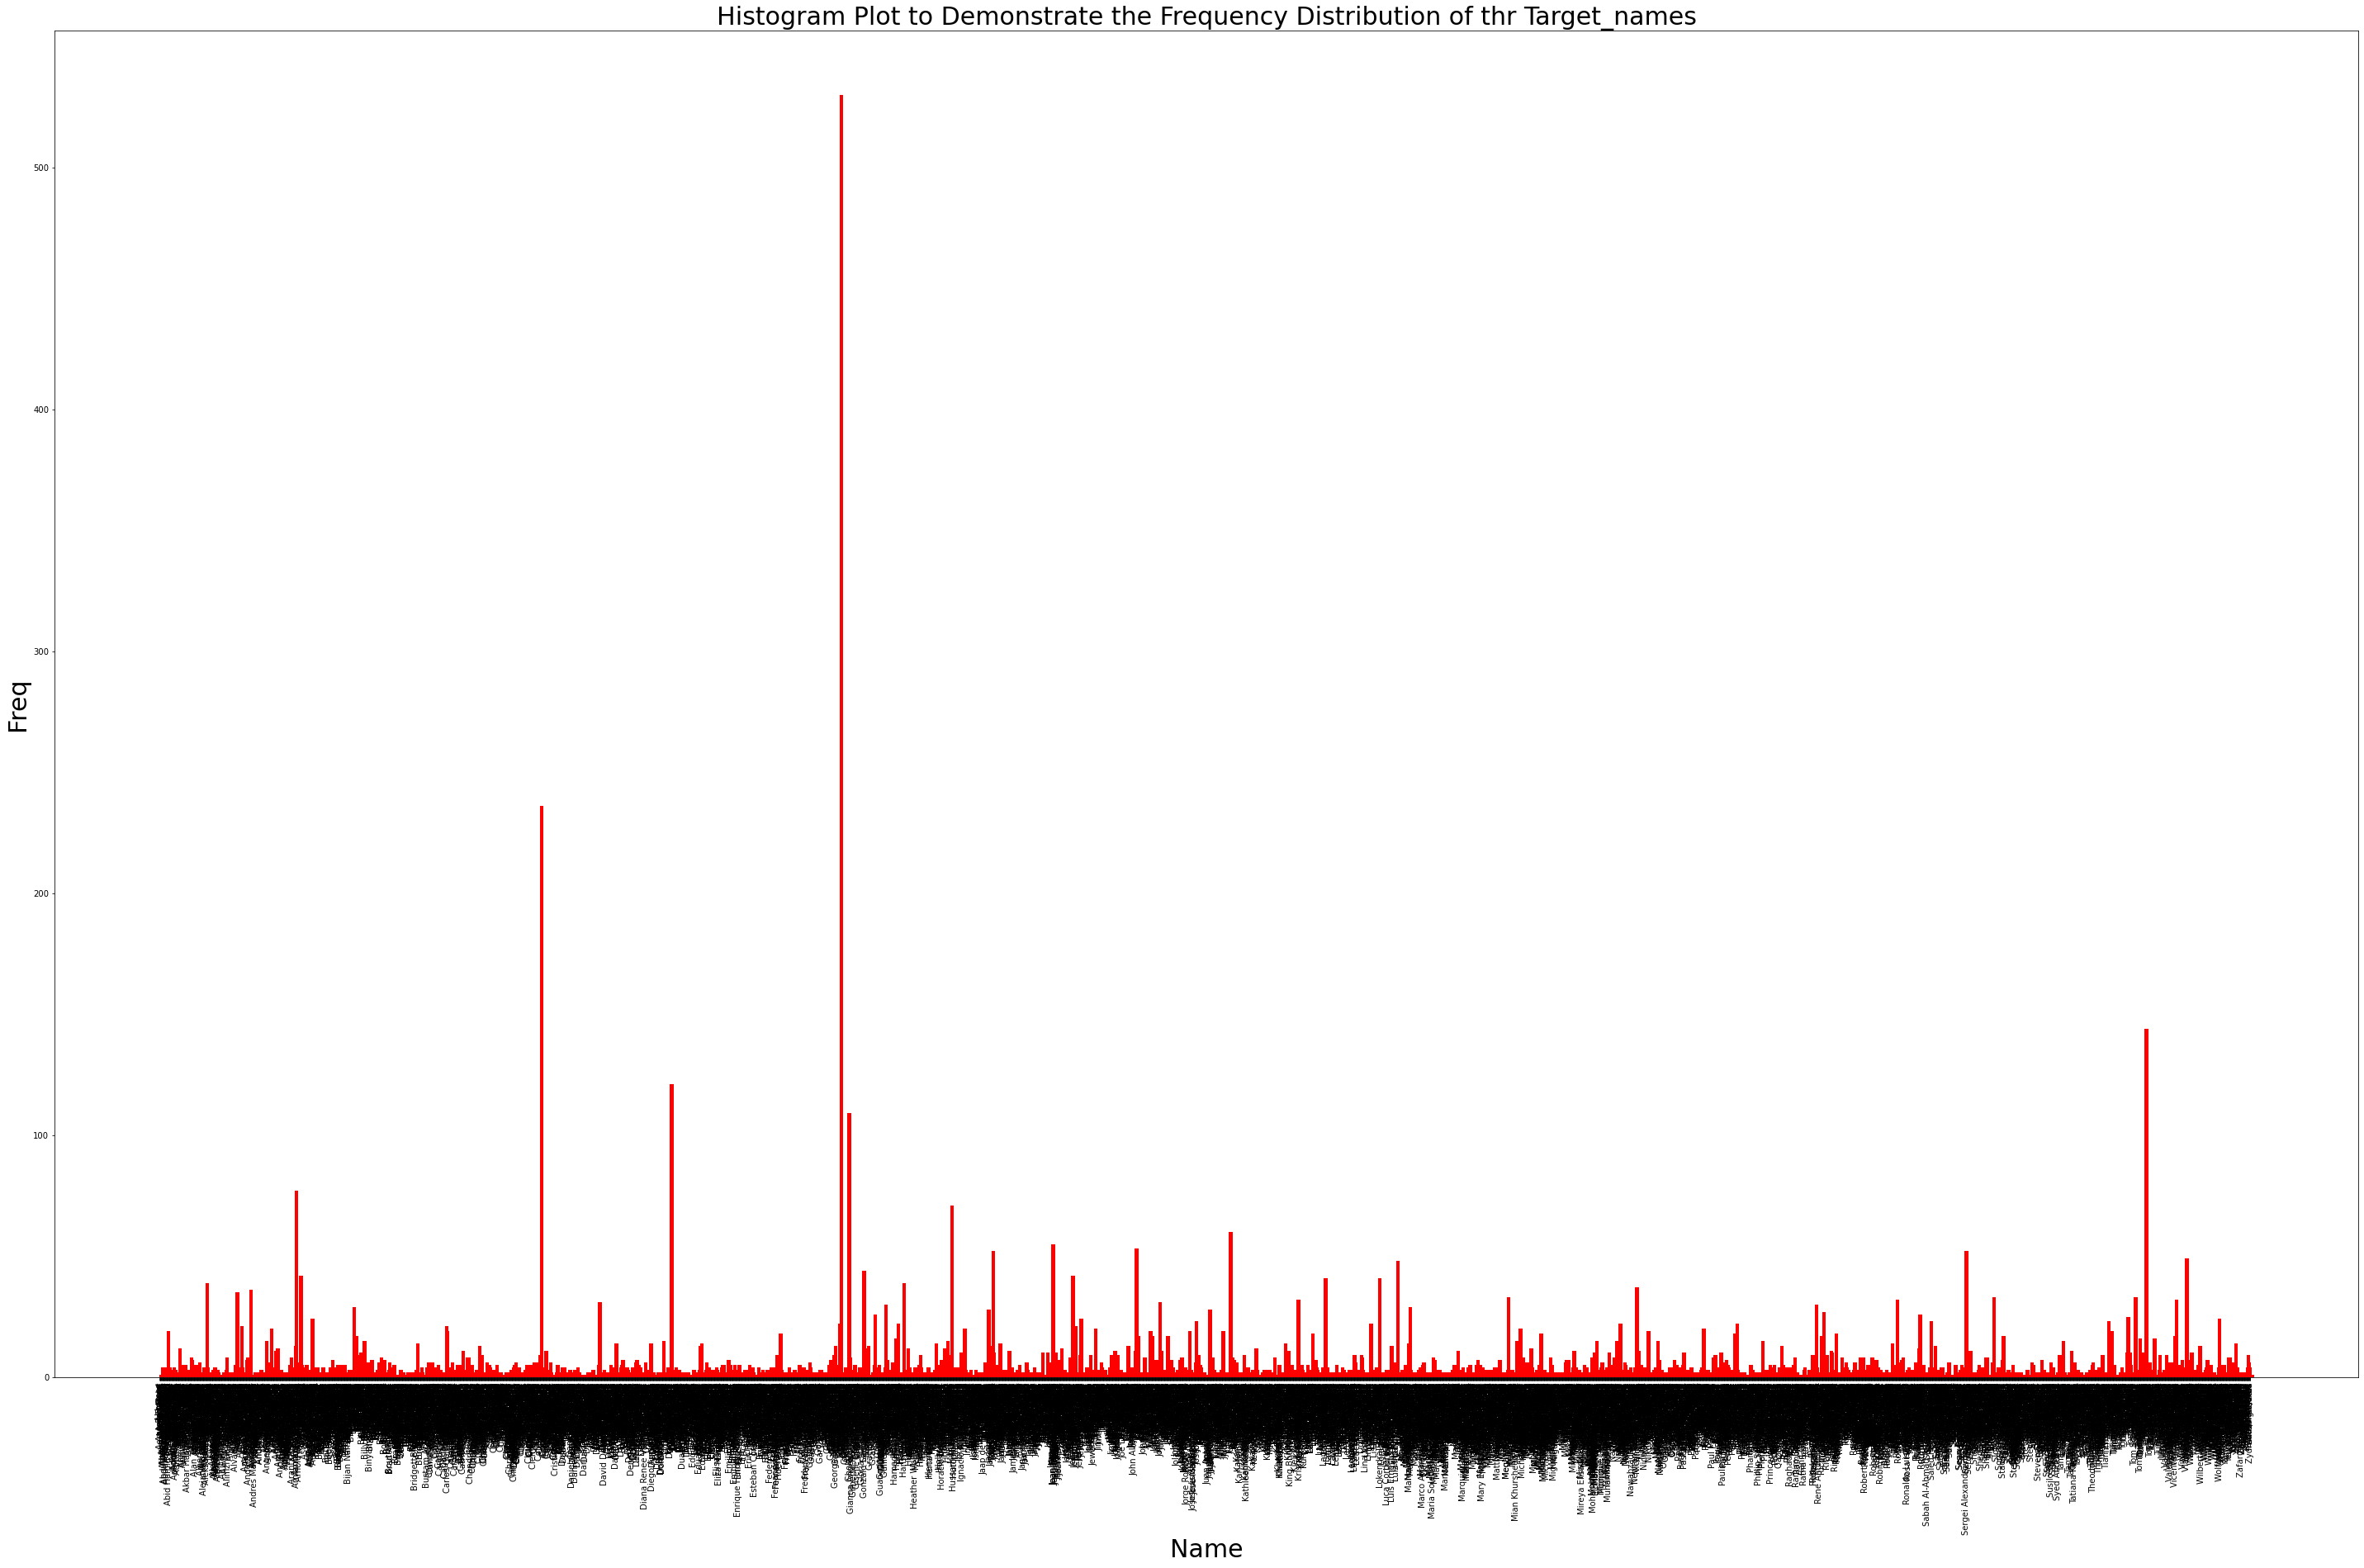

In [72]:
#plotting a histogram to demonstrate the frequency distribution of the target names
plt.rcParams["figure.figsize"]=(50,30)
for item in range(1,5749):
  plt.bar(people.target_names[item],b[item],align='edge',width=10,color='red')
  plt.xlabel("Name",fontsize=30)
  plt.ylabel("Freq",fontsize=30)
  plt.title("Histogram Plot to Demonstrate the Frequency Distribution of thr Target_names",fontsize=30)
  plt.xticks(rotation=90,fontsize=10)
  plt.show

In [73]:
#running PCA algorithm with 100 components on the whole dataset
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [74]:
#printing the shape of the train and test data
print(X_train_pca.shape)
print(X_test_pca.shape)

(9924, 100)
(3309, 100)


In [75]:
knn_pca=KNeighborsClassifier(n_neighbors=1)

In [76]:
#fitting the train data using the KNN classifier
knn_pca.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=1)

In [77]:
#printing the score of the test data
knn_pca.score(X_test_pca,y_test)

0.11483831973405863

In [78]:
#printing the principle components and the shape of a data
pca.components_.shape

(100, 2914)

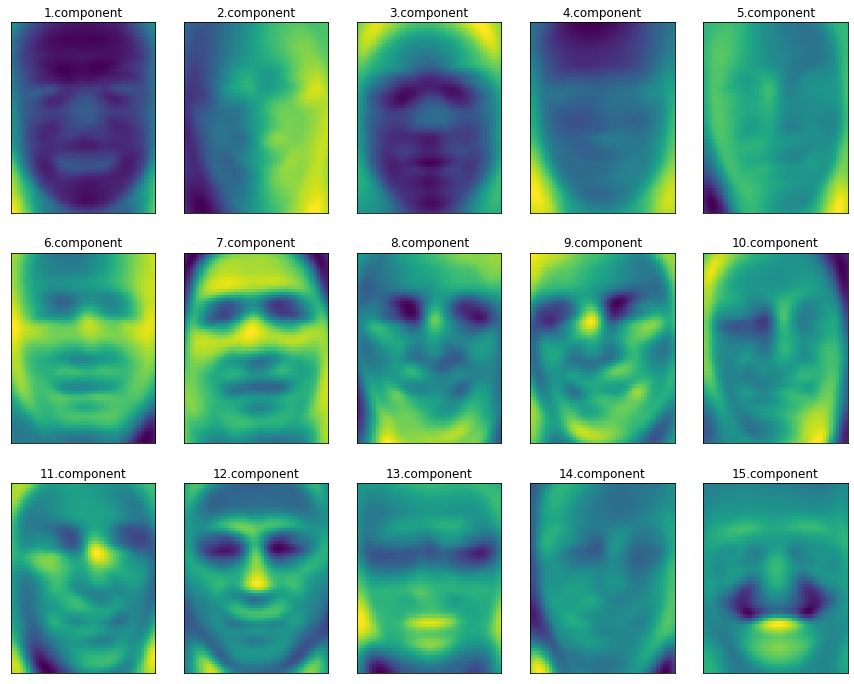

In [79]:
#showing 15 different principle components of an image
image_shape=people.images[0].shape
fix,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i,(component, ax) in enumerate(zip(pca.components_,axes.ravel())):
  ax.imshow(component.reshape(image_shape),cmap='viridis')
  ax.set_title("{}.component".format((i+1)))

In [14]:
#PCA for min face 15
#number of components-75
pca3=PCA(n_components=75,whiten=True,random_state=0).fit(X3_train)
X3_train_pca3 = pca3.transform(X3_train)
X3_test_pca3 = pca3.transform(X3_test)
knn_pca3=KNeighborsClassifier(n_neighbors=1)
knn_pca3.fit(X3_train_pca3,y3_train)
print(knn_pca3.score(X3_test_pca3,y3_test))

#number of components-100
pca3=PCA(n_components=100,whiten=True,random_state=0).fit(X3_train)
X3_train_pca3 = pca3.transform(X3_train)
X3_test_pca3 = pca3.transform(X3_test)
knn_pca3=KNeighborsClassifier(n_neighbors=1)
knn_pca3.fit(X3_train_pca3,y3_train)
print(knn_pca3.score(X3_test_pca3,y3_test))

#number of components-150
pca3=PCA(n_components=150,whiten=True,random_state=0).fit(X3_train)
X3_train_pca3 = pca3.transform(X3_train)
X3_test_pca3 = pca3.transform(X3_test)
knn_pca3=KNeighborsClassifier(n_neighbors=1)
knn_pca3.fit(X3_train_pca3,y3_train)
print(knn_pca3.score(X3_test_pca3,y3_test))

#number of components-200
pca3=PCA(n_components=200,whiten=True,random_state=0).fit(X3_train)
X3_train_pca3 = pca3.transform(X3_train)
X3_test_pca3 = pca3.transform(X3_test)
knn_pca3=KNeighborsClassifier(n_neighbors=1)
knn_pca3.fit(X3_train_pca3,y3_train)
print(knn_pca3.score(X3_test_pca3,y3_test))


0.40044493882091214
0.41156840934371525
0.3692992213570634
0.3548387096774194


In [15]:
#PCA for min face 20
#number of components-75
pca4=PCA(n_components=75,whiten=True,random_state=0).fit(X4_train)
X4_train_pca4 = pca4.transform(X4_train)
X4_test_pca4 = pca4.transform(X4_test)
knn_pca4=KNeighborsClassifier(n_neighbors=1)
knn_pca4.fit(X4_train_pca4,y4_train)
print(knn_pca4.score(X4_test_pca4,y4_test))

#number of components-100
pca4=PCA(n_components=100,whiten=True,random_state=0).fit(X4_train)
X4_train_pca4 = pca4.transform(X4_train)
X4_test_pca4 = pca4.transform(X4_test)
knn_pca4=KNeighborsClassifier(n_neighbors=1)
knn_pca4.fit(X4_train_pca4,y4_train)
print(knn_pca4.score(X4_test_pca4,y4_test))

#number of components-150
pca4=PCA(n_components=150,whiten=True,random_state=0).fit(X4_train)
X4_train_pca4 = pca4.transform(X4_train)
X4_test_pca4 = pca4.transform(X4_test)
knn_pca4=KNeighborsClassifier(n_neighbors=1)
knn_pca4.fit(X4_train_pca4,y4_train)
print(knn_pca4.score(X4_test_pca4,y4_test))

#number of components-200
pca4=PCA(n_components=200,whiten=True,random_state=0).fit(X4_train)
X4_train_pca4 = pca4.transform(X4_train)
X4_test_pca4 = pca4.transform(X4_test)
knn_pca4=KNeighborsClassifier(n_neighbors=1)
knn_pca4.fit(X4_train_pca4,y4_train)
print(knn_pca4.score(X4_test_pca4,y4_test))

0.41534391534391535
0.4193121693121693
0.3968253968253968
0.38095238095238093


In [16]:
#PCA for min face 25
#number of components-75
pca5=PCA(n_components=75,whiten=True,random_state=0).fit(X5_train)
X5_train_pca5 = pca5.transform(X5_train)
X5_test_pca5 = pca5.transform(X5_test)
knn_pca5=KNeighborsClassifier(n_neighbors=1)
knn_pca5.fit(X5_train_pca5,y5_train)
print(knn_pca5.score(X5_test_pca5,y5_test))

#number of components-100
pca5=PCA(n_components=100,whiten=True,random_state=0).fit(X5_train)
X5_train_pca5 = pca5.transform(X5_train)
X5_test_pca5 = pca5.transform(X5_test)
knn_pca5=KNeighborsClassifier(n_neighbors=1)
knn_pca5.fit(X5_train_pca5,y5_train)
print(knn_pca5.score(X5_test_pca5,y5_test))

#number of components-150
pca5=PCA(n_components=150,whiten=True,random_state=0).fit(X5_train)
X5_train_pca5 = pca5.transform(X5_train)
X5_test_pca5 = pca5.transform(X5_test)
knn_pca5=KNeighborsClassifier(n_neighbors=1)
knn_pca5.fit(X5_train_pca5,y5_train)
print(knn_pca5.score(X5_test_pca5,y5_test))

#number of components-200
pca5=PCA(n_components=200,whiten=True,random_state=0).fit(X5_train)
X5_train_pca5 = pca5.transform(X5_train)
X5_test_pca5 = pca5.transform(X5_test)
knn_pca5=KNeighborsClassifier(n_neighbors=1)
knn_pca5.fit(X5_train_pca5,y5_train)
print(knn_pca5.score(X5_test_pca5,y5_test))

0.4435857805255023
0.4760432766615147
0.46367851622874806
0.4435857805255023


In [17]:
#PCA for min face 30
#number of components-75
pca6=PCA(n_components=75,whiten=True,random_state=0).fit(X6_train)
X6_train_pca6 = pca6.transform(X6_train)
X6_test_pca6 = pca6.transform(X6_test)
knn_pca6=KNeighborsClassifier(n_neighbors=1)
knn_pca6.fit(X6_train_pca6,y6_train)
print(knn_pca6.score(X6_test_pca6,y6_test))

#number of components-100
pca6=PCA(n_components=100,whiten=True,random_state=0).fit(X6_train)
X6_train_pca6 = pca6.transform(X6_train)
X6_test_pca6 = pca6.transform(X6_test)
knn_pca6=KNeighborsClassifier(n_neighbors=1)
knn_pca6.fit(X6_train_pca6,y6_train)
print(knn_pca6.score(X6_test_pca6,y6_test))

#number of components-150
pca6=PCA(n_components=150,whiten=True,random_state=0).fit(X6_train)
X6_train_pca6 = pca6.transform(X6_train)
X6_test_pca6 = pca6.transform(X6_test)
knn_pca6=KNeighborsClassifier(n_neighbors=1)
knn_pca6.fit(X6_train_pca6,y6_train)
print(knn_pca6.score(X6_test_pca6,y6_test))

#number of components-200
pca6=PCA(n_components=200,whiten=True,random_state=0).fit(X6_train)
X6_train_pca6 = pca6.transform(X6_train)
X6_test_pca6 = pca6.transform(X6_test)
knn_pca6=KNeighborsClassifier(n_neighbors=1)
knn_pca6.fit(X6_train_pca6,y6_train)
print(knn_pca6.score(X6_test_pca6,y6_test))

0.5126475548060708
0.5126475548060708
0.5092748735244519
0.5025295109612141


(3595, 2914)
(3595, 200)
(3023, 2914)
(3023, 200)
(2588, 2914)
(2588, 200)
(2370, 2914)
(2370, 200)


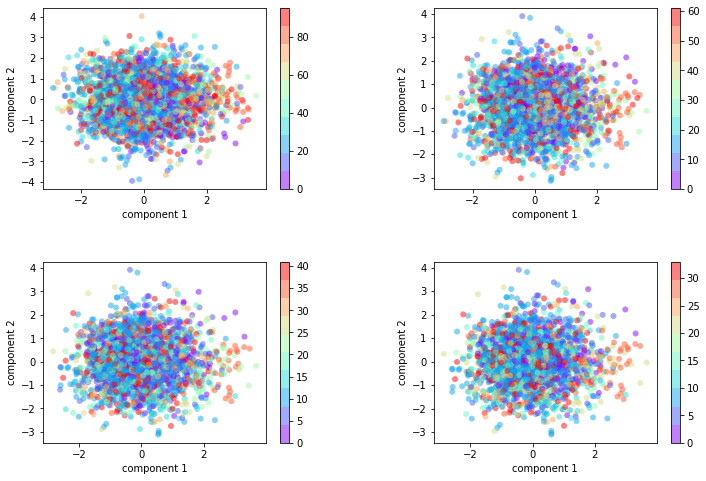

In [84]:
#plotting scatter plot for pca with min face 15,20,25 and 30
projected1 = pca3.fit_transform(p3.data)
print(p3.data.shape)
print(projected1.shape)
projected2 = pca4.fit_transform(p4.data)
print(p4.data.shape)
print(projected2.shape)
projected3 = pca5.fit_transform(p5.data)
print(p5.data.shape)
print(projected3.shape)
projected4 = pca6.fit_transform(p6.data)
print(p6.data.shape)
print(projected4.shape)
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 5):
  ax = fig.add_subplot(2, 2, i)
  if(i==1):
    plt.scatter(projected1[:, 0], projected1[:, 1],
            c=p3.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar();
  elif(i==2):
    plt.scatter(projected2[:, 0], projected2[:, 1],
            c=p4.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar();
  elif(i==3):
    plt.scatter(projected3[:, 0], projected3[:, 1],
            c=p5.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar();
  else:
    plt.scatter(projected4[:, 0], projected4[:, 1],
            c=p6.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar();

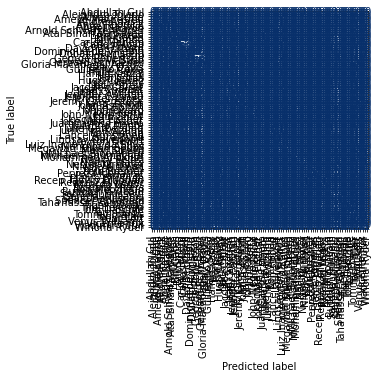

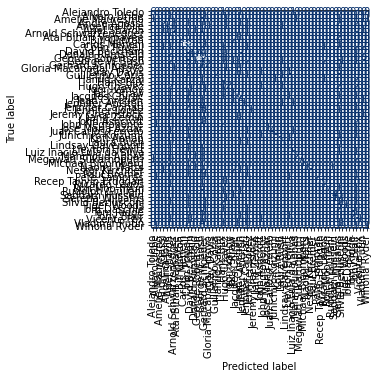

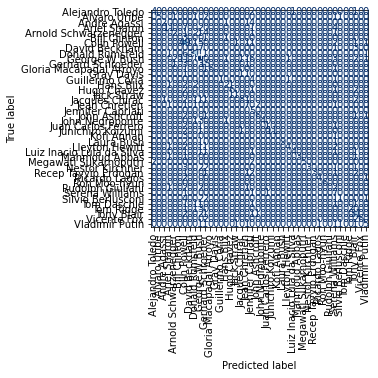

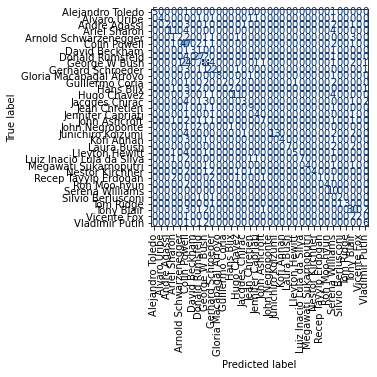

In [18]:
#printing the confusion matrix
#for min face 15
clf=SVC(kernel='rbf', class_weight = 'balanced')
clf.fit(X3_train_pca3, y3_train)
clf.score(X3_test_pca3, y3_test)
y3_pred_pca = clf.predict(X3_test_pca3)
cm=confusion_matrix(y3_test,y3_pred_pca,labels=range(len(target3_names)))
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target3_names)
display.plot(cmap = 'Blues' , colorbar = False , xticks_rotation = "vertical")

#for min face 20.
clf=SVC(kernel='rbf', class_weight = 'balanced')
clf.fit(X4_train_pca4, y4_train)
clf.score(X4_test_pca4, y4_test)
y4_pred_pca = clf.predict(X4_test_pca4)
cm=confusion_matrix(y4_test,y4_pred_pca,labels=range(len(target4_names)))
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target4_names)
display.plot(cmap = 'Blues' , colorbar = False , xticks_rotation = "vertical")

#for min face 25
clf=SVC(kernel='rbf', class_weight = 'balanced')
clf.fit(X5_train_pca5, y5_train)
clf.score(X5_test_pca5, y5_test)
y5_pred_pca = clf.predict(X5_test_pca5)
cm=confusion_matrix(y5_test,y5_pred_pca,labels=range(len(target5_names)))
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target5_names)
display.plot(cmap = 'Blues' , colorbar = False , xticks_rotation = "vertical")

  
#for min face 30
clf=SVC(kernel='rbf', class_weight = 'balanced')
clf.fit(X6_train_pca6, y6_train)
clf.score(X6_test_pca6, y6_test)
y6_pred_pca = clf.predict(X6_test_pca6)
cm=confusion_matrix(y6_test,y6_pred_pca,labels=range(len(target6_names)))
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target6_names)
display.plot(cmap = 'Blues' , colorbar = False , xticks_rotation = "vertical")


In [86]:
#printing the classification report for min face 15
print(classification_report(y3_test,y3_pred_pca,target_names=target3_names))

                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         5
         Alejandro Toledo       1.00      0.60      0.75         5
             Alvaro Uribe       0.67      0.44      0.53         9
          Amelie Mauresmo       1.00      0.33      0.50         6
             Andre Agassi       0.11      0.60      0.19         5
             Andy Roddick       0.00      0.00      0.00         3
           Angelina Jolie       0.00      0.00      0.00         6
             Ariel Sharon       0.48      0.60      0.54        25
    Arnold Schwarzenegger       0.16      0.50      0.24        10
     Atal Bihari Vajpayee       1.00      0.43      0.60         7
             Bill Clinton       0.67      0.25      0.36         8
               Bill Gates       1.00      0.33      0.50         3
               Bill Simon       1.00      0.20      0.33         5
             Carlos Menem       1.00      0.67      0.80     

D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
#printing the classification report for min face 20
print(classification_report(y4_test,y4_pred_pca,target_names=target4_names))

                           precision    recall  f1-score   support

         Alejandro Toledo       0.75      0.50      0.60        12
             Alvaro Uribe       0.62      0.56      0.59         9
          Amelie Mauresmo       0.00      0.00      0.00        10
             Andre Agassi       0.40      0.20      0.27        10
           Angelina Jolie       1.00      0.17      0.29         6
             Ariel Sharon       0.34      0.72      0.46        18
    Arnold Schwarzenegger       0.60      0.17      0.26        18
     Atal Bihari Vajpayee       1.00      0.43      0.60         7
             Bill Clinton       1.00      0.33      0.50         6
             Carlos Menem       1.00      0.60      0.75         5
             Colin Powell       0.50      0.82      0.62        71
            David Beckham       0.50      0.50      0.50         4
          Donald Rumsfeld       0.74      0.47      0.58        36
         George Robertson       1.00      0.60      0.75     

D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#printing the classification report for min face 25
print(classification_report(y5_test,y5_pred_pca,target_names=target5_names))

                           precision    recall  f1-score   support

         Alejandro Toledo       0.67      0.50      0.57         8
             Alvaro Uribe       1.00      0.45      0.62        11
             Andre Agassi       0.67      0.25      0.36         8
             Ariel Sharon       0.65      0.44      0.52        25
    Arnold Schwarzenegger       0.33      0.17      0.22        12
             Bill Clinton       0.00      0.00      0.00         5
             Colin Powell       0.40      0.79      0.54        62
            David Beckham       0.00      0.00      0.00        11
          Donald Rumsfeld       0.72      0.76      0.74        41
            George W Bush       0.72      0.77      0.74       133
        Gerhard Schroeder       0.41      0.65      0.50        23
  Gloria Macapagal Arroyo       1.00      0.67      0.80         9
               Gray Davis       0.00      0.00      0.00         3
          Guillermo Coria       1.00      0.14      0.25     

D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
#printing the classification report for min face 30
print(classification_report(y6_test,y6_pred_pca,target_names=target6_names))

                           precision    recall  f1-score   support

         Alejandro Toledo       1.00      0.71      0.83         7
             Alvaro Uribe       1.00      0.44      0.62         9
             Andre Agassi       1.00      0.20      0.33        10
             Ariel Sharon       0.58      0.58      0.58        19
    Arnold Schwarzenegger       0.67      0.18      0.29        11
             Colin Powell       0.37      0.85      0.52        55
            David Beckham       1.00      0.50      0.67         6
          Donald Rumsfeld       0.56      0.79      0.66        34
            George W Bush       0.82      0.70      0.75       140
        Gerhard Schroeder       0.56      0.76      0.65        29
  Gloria Macapagal Arroyo       1.00      0.80      0.89        10
          Guillermo Coria       1.00      0.20      0.33        10
                Hans Blix       0.67      0.22      0.33         9
              Hugo Chavez       0.65      0.55      0.59     

D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Python\python2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
a3=p3.target_names
print(a3)
X3 = p3.data
y3 = p3.target
print("Length of X3:",len(X3))
print("Total number of perseon with min face 15:",len(a3))

['Abdullah Gul' 'Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo'
 'Andre Agassi' 'Andy Roddick' 'Angelina Jolie' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee' 'Bill Clinton'
 'Bill Gates' 'Bill Simon' 'Carlos Menem' 'Carlos Moya' 'Colin Powell'
 'David Beckham' 'Dominique de Villepin' 'Donald Rumsfeld' 'Fidel Castro'
 'George Robertson' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gray Davis' 'Guillermo Coria' 'Halle Berry'
 'Hamid Karzai' 'Hans Blix' 'Hu Jintao' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Charest' 'Jean Chretien'
 'Jennifer Aniston' 'Jennifer Capriati' 'Jennifer Lopez'
 'Jeremy Greenstock' 'Jiang Zemin' 'John Ashcroft' 'John Bolton'
 'John Howard' 'John Kerry' 'John Negroponte' 'John Snow'
 'Joschka Fischer' 'Jose Maria Aznar' 'Juan Carlos Ferrero'
 'Julianne Moore' 'Julie Gerberding' 'Junichiro Koizumi' 'Kofi Annan'
 'Lance Armstrong' 'Laura Bush' 'Lindsay Davenport' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Si

In [4]:
#creating a front end for the user to browse an image using the tkinter and PIL packages

import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image

root = tk.Tk()
root.geometry("700x500")

# Create a Canvas widget
canvas = tk.Canvas(root, width=1300, height=900)
canvas.pack()

# Load the background image
bg_image = ImageTk.PhotoImage(Image.open("E:\\draw\\bg.jpg"))

# Place the background image on the canvas
canvas.create_image(0, 0, image=bg_image, anchor="nw")

frame = tk.Frame(root, width=600, height=400, bg="#3d2352")
frame.place(anchor="center", relx=0.5, rely=0.5)

lbl_pic_path = tk.Label(frame, text='Image Path:', padx=25, pady=25, font=('verdana', 16), bg='#8874a3')
lbl_show_pic = tk.Label(frame, bg='#3d2352')
entry_pic_path = tk.Entry(frame, font=('verdana', 16))
btn_browse = tk.Button(frame, text='Select Image', bg='grey', fg='#ffffff', font=('verdana', 16))
btn_close = tk.Button(frame, text='CLOSE', bg='grey', fg='#ffffff', font=('verdana', 16))

def selectPic():
    global img
    global filename
    filename = filedialog.askopenfilename(initialdir="/images", title="Select Image",
                                          filetypes=(("png images", ".png"), ("jpg images", ".jpg")))
    img = Image.open(filename)
    img = img.resize((200, 200), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    lbl_show_pic['image'] = img
    entry_pic_path.insert(0, filename)

def close():
    root.destroy()

btn_browse['command'] = selectPic
btn_close['command'] = close

#btn_close.pack(pady=20)

lbl_pic_path.pack()
entry_pic_path.pack(padx=(0, 20))
lbl_show_pic.pack()
btn_browse.pack(padx=10, pady=10)
btn_close.pack(pady=20)
root.mainloop()

In [5]:
print(filename)
xtk=filename.split('/')
pn=xtk[-1]
pic=''
ytk=pn.split('_') 
for i in range(0,len(ytk)-1):
    pic=pic+ytk[i]+" "
pic=pic[:-1]
print(pic)

C:/Users/ANWESHA/OneDrive/Desktop/face/Mohammed_Al-Douri_0002.jpg
Mohammed Al-Douri


In [6]:
#print target value of the selected person

for i in range(0,len(a3)):
  if(a3[i]==pic):
    target_value=i
    print(i)

64


In [7]:
#total number of faces of the selected person
xx=[]
count=0
y=p3.target
for i in range(0,len(X3)):
  if(y[i]==target_value):
    xx.append(i)
    count=count+1
print("total:",count)

total: 15


In [8]:
#storing the first 15 indexes of the person in a list
print("Array which store the indexes for first 15 images")
count=1
ar=[]
for i in range(0,13233):
  if(y3[i]==target_value):
    ar.append(i)
    count=count+1
    if(count>15):
      break
print(ar)

Array which store the indexes for first 15 images
[44, 112, 165, 245, 762, 1459, 1581, 2042, 2146, 2540, 2626, 2646, 2833, 2864, 2972]


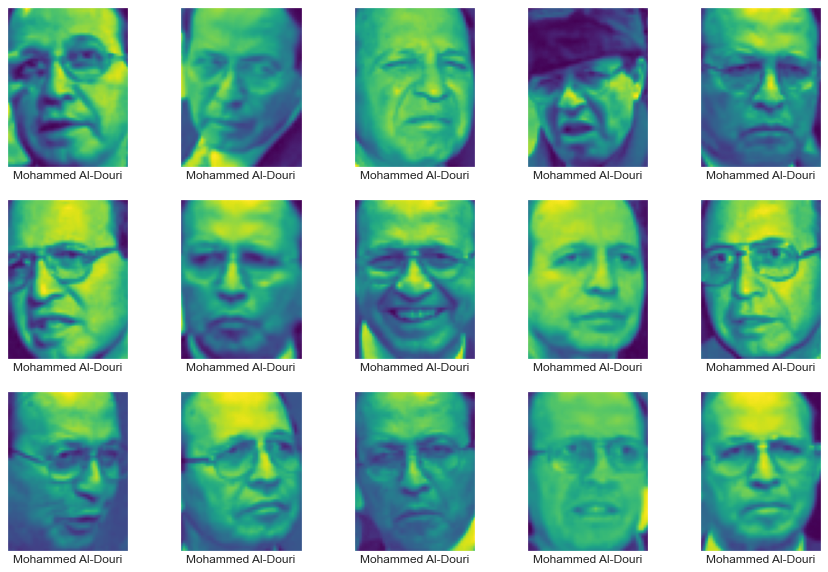

In [98]:
#showing the person name of the browsed image and printing 15 images of that same person
import seaborn as sns
sns.set()
 
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
 
for i, axi in enumerate(ax.flat):
    axi.imshow(p3.images[ar[i]],cmap='viridis') 
    axi.set(xticks=[], yticks=[], xlabel=p3.target_names[target_value])

In [2]:
#importing various packages to run the CNN classification
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
# Fetch the LFW dataset with min face 20
cnn_p4 = fetch_lfw_people(min_faces_per_person=20, resize=0.4)

In [4]:
# Access the data and target labels
cnn_x4 = cnn_p4.images
cnn_y4 = cnn_p4.target

In [5]:
# Normalize pixel values
cnn_x4 = cnn_x4.astype('float32') / 255.0
cnn_y4 = cnn_y4.astype('float32') / 255.0

In [6]:
# Split the data into training and test sets
cnn_x4_train, cnn_x4_test, cnn_y4_train, cnn_y4_test = train_test_split(cnn_x4, cnn_y4, test_size=0.2, random_state=42)


In [7]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50,37, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(set(cnn_y4_train)), activation='softmax'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
cnn_x4_train.shape

(2418, 50, 37)

In [10]:
cnn_x4_test.shape

(605, 50, 37)

In [11]:
# Reshape and resize the images
cnn_x4_train = cnn_x4_train.reshape(cnn_x4_train.shape[0], 50, 37, 1)
cnn_x4_test = cnn_x4_test.reshape(cnn_x4_test.shape[0], 50, 37, 1)

In [12]:
cnn_y4_train = cnn_y4_train.tolist()
cnn_y4_test = cnn_y4_test.tolist()

In [13]:
# Convert the labels to numpy arrays
cnn_y4_train = np.array(cnn_y4_train)
cnn_y4_test = np.array(cnn_y4_test)

In [14]:
# Get the number of unique labels
num_classes = len(np.unique(cnn_y4_train))

In [15]:
num_classes1 = len(np.unique(cnn_y4_test))

In [16]:
# Convert labels to one-hot encoding using to_categorical
cnn_y4_train = tf.keras.utils.to_categorical(cnn_y4_train, num_classes)
cnn_y4_test = tf.keras.utils.to_categorical(cnn_y4_test, num_classes1)

In [17]:
# Train the model
history=model.fit(cnn_x4_train, cnn_y4_train, batch_size=128, epochs=10, validation_data=(cnn_x4_test, cnn_y4_test))

Epoch 1/10
19/19 [==============================] - 19s 283ms/step - loss: 1.1048 - accuracy: 0.9318 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
19/19 [==============================] - 4s 204ms/step - loss: 1.0446e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
19/19 [==============================] - 4s 194ms/step - loss: 6.4135e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
19/19 [==============================] - 4s 196ms/step - loss: 4.3777e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
19/19 [==============================] - 4s 186ms/step - loss: 2.4157e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 4s 200ms/step - loss: 3.0427e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
19/19 [==============================] - 4s 217ms/step - loss: 2.5674e-07 - accuracy: 1.0000

In [18]:
# Evaluate the model
cnn_y4_pred = model.predict(cnn_x4_test)
cnn_y4_pred_classes = np.argmax(cnn_y4_pred, axis=1)
accuracy = accuracy_score(np.argmax(cnn_y4_test, axis=1), cnn_y4_pred_classes)
print("Accuracy:", accuracy)

19/19 [==============================] - 4s 15ms/step
Accuracy: 1.0


In [20]:
# Fetch the LFW dataset with min face 30
cnn_p6 = fetch_lfw_people(min_faces_per_person=30, resize=0.4)

In [21]:
# Access the data and target labels
cnn_x6 = cnn_p6.images
cnn_y6 = cnn_p6.target

# Normalize pixel values
cnn_x6 = cnn_x6.astype('float32') / 255.0
cnn_y6 = cnn_y6.astype('float32') / 255.0

# Split the data into training and test sets
cnn_x6_train, cnn_x6_test, cnn_y6_train, cnn_y6_test = train_test_split(cnn_x6, cnn_y6, test_size=0.2, random_state=42)


In [22]:
# Define the CNN model
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50,37, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(len(set(cnn_y6_train)), activation='softmax'))

In [23]:
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
print(cnn_x6_train.shape)
print(cnn_x6_test.shape)

(1896, 50, 37)
(474, 50, 37)


In [25]:
# Reshape and resize the images
cnn_x6_train = cnn_x6_train.reshape(cnn_x6_train.shape[0], 50, 37, 1)
cnn_x6_test = cnn_x6_test.reshape(cnn_x6_test.shape[0], 50, 37, 1)

cnn_y6_train = cnn_y6_train.tolist()
cnn_y6_test = cnn_y6_test.tolist()

# Convert the labels to numpy arrays
cnn_y6_train = np.array(cnn_y6_train)
cnn_y6_test = np.array(cnn_y6_test)

# Get the number of unique labels
num1_classes = len(np.unique(cnn_y6_train))
num1_classes1 = len(np.unique(cnn_y6_test))

# Convert labels to one-hot encoding using to_categorical
cnn_y6_train = tf.keras.utils.to_categorical(cnn_y6_train, num1_classes)
cnn_y6_test = tf.keras.utils.to_categorical(cnn_y6_test, num1_classes1)

In [26]:
# Train the model
history1=model1.fit(cnn_x6_train, cnn_y6_train, batch_size=128, epochs=10, validation_data=(cnn_x6_test, cnn_y6_test))

Epoch 1/10
15/15 [==============================] - 5s 254ms/step - loss: 1.0453 - accuracy: 0.9293 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
15/15 [==============================] - 3s 208ms/step - loss: 6.2365e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 3s 217ms/step - loss: 4.4012e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 3s 195ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 3s 211ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 3s 207ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 3s 221ms/step - loss: 0.0000e+00 - accuracy: 1.0000 

In [27]:
# Evaluate the model
cnn_y6_pred = model1.predict(cnn_x6_test)
cnn_y6_pred_classes = np.argmax(cnn_y6_pred, axis=1)
accuracy1 = accuracy_score(np.argmax(cnn_y6_test, axis=1), cnn_y6_pred_classes)
print("Accuracy:", accuracy1)

15/15 [==============================] - 0s 19ms/step
Accuracy: 1.0


In [46]:
# Fetch the LFW dataset with min face 25
cnn_p5 = fetch_lfw_people(min_faces_per_person=25, resize=0.4)

In [47]:
# Access the data and target labels
cnn_x5 = cnn_p5.images
cnn_y5 = cnn_p5.target

# Normalize pixel values
cnn_x5 = cnn_x5.astype('float32') / 255.0
cnn_y5 = cnn_y5.astype('float32') / 255.0

# Split the data into training and test sets
cnn_x5_train, cnn_x5_test, cnn_y5_train, cnn_y5_test = train_test_split(cnn_x5, cnn_y5, test_size=0.2, random_state=42)


In [48]:
# Define the CNN model
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50,37, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(len(set(cnn_y5_train)), activation='softmax'))

In [49]:
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
print(cnn_x5_train.shape)
print(cnn_x5_test.shape)

(2070, 50, 37)
(518, 50, 37)


In [51]:
# Reshape and resize the images
cnn_x5_train = cnn_x5_train.reshape(cnn_x5_train.shape[0], 50, 37, 1)
cnn_x5_test = cnn_x5_test.reshape(cnn_x5_test.shape[0], 50, 37, 1)

cnn_y5_train = cnn_y5_train.tolist()
cnn_y5_test = cnn_y5_test.tolist()

# Convert the labels to numpy arrays
cnn_y5_train = np.array(cnn_y5_train)
cnn_y5_test = np.array(cnn_y5_test)

# Get the number of unique labels
num2_classes = len(np.unique(cnn_y5_train))
num2_classes1 = len(np.unique(cnn_y5_test))

# Convert labels to one-hot encoding using to_categorical
cnn_y5_train = tf.keras.utils.to_categorical(cnn_y5_train, num2_classes)
cnn_y5_test = tf.keras.utils.to_categorical(cnn_y5_test, num2_classes1)

In [52]:
# Train the model
history2=model2.fit(cnn_x5_train, cnn_y5_train, batch_size=128, epochs=10, validation_data=(cnn_x5_test, cnn_y5_test))

Epoch 1/10
17/17 [==============================] - 4s 182ms/step - loss: 1.2431 - accuracy: 0.9063 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
17/17 [==============================] - 3s 186ms/step - loss: 2.8736e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
17/17 [==============================] - 3s 196ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
17/17 [==============================] - 3s 194ms/step - loss: 2.0710e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
17/17 [==============================] - 4s 209ms/step - loss: 4.0312e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
17/17 [==============================] - 3s 186ms/step - loss: 1.7251e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
17/17 [==============================] - 3s 187ms/step - loss: 0.0000e+00 - accuracy: 1.0000 

In [53]:
# Evaluate the model
cnn_y5_pred = model2.predict(cnn_x5_test)
cnn_y5_pred_classes = np.argmax(cnn_y5_pred, axis=1)
accuracy2 = accuracy_score(np.argmax(cnn_y5_test, axis=1), cnn_y5_pred_classes)
print("Accuracy:", accuracy2)

17/17 [==============================] - 0s 15ms/step
Accuracy: 1.0


In [55]:
# Fetch the LFW dataset with min face 15
cnn_p3 = fetch_lfw_people(min_faces_per_person=15, resize=0.4)

In [56]:
# Access the data and target labels
cnn_x3 = cnn_p3.images
cnn_y3 = cnn_p3.target

# Normalize pixel values
cnn_x3 = cnn_x3.astype('float32') / 255.0
cnn_y3 = cnn_y3.astype('float32') / 255.0

# Split the data into training and test sets
cnn_x3_train, cnn_x3_test, cnn_y3_train, cnn_y3_test = train_test_split(cnn_x3, cnn_y3, test_size=0.2, random_state=42)


In [57]:
# Define the CNN model
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50,37, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(len(set(cnn_y3_train)), activation='softmax'))

In [58]:
# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
print(cnn_x3_train.shape)
print(cnn_x3_test.shape)

(2876, 50, 37)
(719, 50, 37)


In [60]:
# Reshape and resize the images
cnn_x3_train = cnn_x3_train.reshape(cnn_x3_train.shape[0], 50, 37, 1)
cnn_x3_test = cnn_x3_test.reshape(cnn_x3_test.shape[0], 50, 37, 1)

cnn_y3_train = cnn_y3_train.tolist()
cnn_y3_test = cnn_y3_test.tolist()

# Convert the labels to numpy arrays
cnn_y3_train = np.array(cnn_y3_train)
cnn_y3_test = np.array(cnn_y3_test)

# Get the number of unique labels
num3_classes = len(np.unique(cnn_y3_train))
num3_classes1 = len(np.unique(cnn_y3_test))

# Convert labels to one-hot encoding using to_categorical
cnn_y3_train = tf.keras.utils.to_categorical(cnn_y3_train, num3_classes)
cnn_y3_test = tf.keras.utils.to_categorical(cnn_y3_test, num3_classes1)

In [62]:
# Train the model
history3=model3.fit(cnn_x3_train, cnn_y3_train, batch_size=128, epochs=10, validation_data=(cnn_x3_test, cnn_y3_test))

Epoch 1/10
23/23 [==============================] - 5s 199ms/step - loss: 1.2264 - accuracy: 0.9239 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
23/23 [==============================] - 4s 181ms/step - loss: 2.4139e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
23/23 [==============================] - 5s 199ms/step - loss: 4.1449e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
23/23 [==============================] - 5s 197ms/step - loss: 4.6838e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
23/23 [==============================] - 5s 195ms/step - loss: 2.1968e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
23/23 [==============================] - 5s 232ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
23/23 [==============================] - 6s 250ms/step - loss: 0.0000e+00 - accuracy: 1.0000 

In [63]:
# Evaluate the model
cnn_y3_pred = model3.predict(cnn_x3_test)
cnn_y3_pred_classes = np.argmax(cnn_y3_pred, axis=1)
accuracy3 = accuracy_score(np.argmax(cnn_y3_test, axis=1), cnn_y3_pred_classes)
print("Accuracy:", accuracy3)

23/23 [==============================] - 0s 14ms/step
Accuracy: 1.0


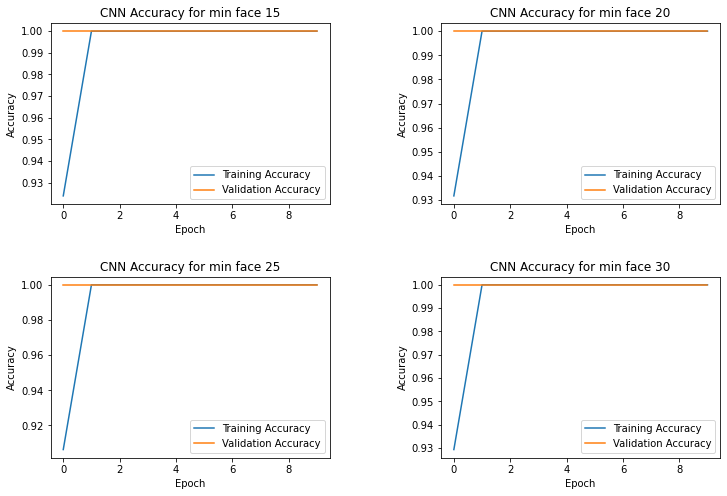

In [70]:
#plotting the graphs for min face 15,20,25 and 30 after applying cnn algorithm
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 5):
    ax = fig.add_subplot(2, 2, i)
    if(i==1):
        plt.plot(history3.history['accuracy'], label='Training Accuracy')
        plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
        plt.title('CNN Accuracy for min face 15')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        #plt.show()
    elif(i==2):
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('CNN Accuracy for min face 20')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
    elif(i==3):
        plt.plot(history2.history['accuracy'], label='Training Accuracy')
        plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
        plt.title('CNN Accuracy for min face 25')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
    else:
        plt.plot(history1.history['accuracy'], label='Training Accuracy')
        plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
        plt.title('CNN Accuracy for min face 30')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
